<a href="https://colab.research.google.com/github/ShreyJais/RL/blob/main/2348520_RL_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model-Free Prediction & Control With Monte Carlo

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

In [17]:
class MonteCarloGridWorld:
  def __init__(self, grid, rewards, actions, action_effects, discount_factor=0.9, epsilon=0.1):
    """
    Parameters:
    - grid: 2D numpy array representing the grid world
    - rewards: Dictionary mapping grid cell values to rewards
    - actions: List of possible actions
    - action_effects: Dictionary mapping actions to state changes
    - discount_factor: Gamma value for future reward discounting
    - epsilon: Exploration rate for epsilon-greedy policy
    """

    self.grid = grid
    self.rewards = rewards
    self.actions = actions
    self.action_effects = action_effects
    self.discount_factor = discount_factor
    self.epsilon = epsilon
    self.episode_lengths = []
    self.total_returns = []
    self.q_value_progression = defaultdict(list)

  def is_terminal(self, state):
    i, j = state
    return self.grid[i, j] in (1, 2)

  def get_next_state(self, state, action):
    i, j = state
    di, dj = self.action_effects[action]
    next_i, next_j = i + di, j + dj
    # Ensure next state is within grid boundaries
    if 0 <= next_i < self.grid.shape[0] and 0 <= next_j < self.grid.shape[1]:
      return next_i, next_j
    return state

  def epsilon_greedy_policy(self, Q, state):
    if random.random() < self.epsilon:
      return random.choice(self.actions)
    else:
      return max(self.actions, key=lambda a: Q[state, a])

  def monte_carlo_control(self, num_episodes=5000, start_state=(2, 0)):
    """
    Perform Monte Carlo Control to find optimal policy

    Returns:
    - Q: Action-value function
    - policy: Derived policy
    """
    # Initialize data structures
    Q = defaultdict(float)
    returns = defaultdict(list)
    policy = {}

    # Episode generation and learning
    for episode_num in range(num_episodes):
      # Reset for each episode
      state = start_state
      episode = []

      # Generate episode
      while not self.is_terminal(state):
        action = self.epsilon_greedy_policy(Q, state)
        next_state = self.get_next_state(state, action)
        reward = self.rewards[self.grid[state]]

        episode.append((state, action, reward))

        # Track Q-value progression
        for a in self.actions:
          self.q_value_progression[(state, a)].append(Q[state, a])

        state = next_state

      # Episode tracking
      self.episode_lengths.append(len(episode))

      # Calculate returns
      G = 0
      visited = set()
      total_episode_return = 0

      for t in reversed(range(len(episode))):
        state, action, reward = episode[t]
        G = reward + self.discount_factor * G
        total_episode_return += reward

        # First-visit Monte Carlo update
        if (state, action) not in visited:
          visited.add((state, action))
          returns[(state, action)].append(G)
          Q[state, action] = np.mean(returns[(state, action)])

      self.total_returns.append(total_episode_return)

    # Derive policy from learned Q-values
    for state_action in Q.keys():
      state, action = state_action
      if state not in policy:
        policy[state] = max(self.actions, key=lambda a: Q[state, a])

    return Q, policy

  def visualize_learning_process(self):
    # 1. Episode Length over Time
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.plot(np.convolve(self.episode_lengths, np.ones(100)/100, mode='valid'))
    plt.title('Average Episode Length')
    plt.xlabel('Episodes')
    plt.ylabel('Length')

    # 2. Total Returns over Time
    plt.subplot(132)
    plt.plot(np.convolve(self.total_returns, np.ones(100)/100, mode='valid'))
    plt.title('Average Total Return')
    plt.xlabel('Episodes')
    plt.ylabel('Total Return')

    # 3. Q-Value Convergence for a few states
    plt.subplot(133)
    sample_states = list(self.q_value_progression.keys())[:5]
    for state_action in sample_states:
      plt.plot(self.q_value_progression[state_action], label=f'{state_action}')
    plt.title('Q-Value Convergence')
    plt.xlabel('Learning Steps')
    plt.ylabel('Q-Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [18]:
# Example usage
grid = np.array([
    [0, 0, 0, 1],
    [0, 3, 0, 2],
    [0, 0, 0, 0]
])
rewards = {0: -0.04, 1: 1, 2: -1, 3: 0}
actions = ['up', 'down', 'left', 'right']
action_effects = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

In [19]:
# Create and run Monte Carlo Control
mc_world = MonteCarloGridWorld(grid, rewards, actions, action_effects)
Q, policy = mc_world.monte_carlo_control()

In [20]:
# Print results
print("Learned Q-values:")
for key, value in Q.items():
    print(f"State {key[0]} Action {key[1]}: {value:.2f}")

Learned Q-values:
State (2, 0) Action up: -0.11
State (2, 0) Action down: -0.15
State (2, 0) Action left: -0.15
State (2, 0) Action right: -0.12
State (1, 0) Action up: -0.15
State (1, 0) Action down: -0.15
State (1, 0) Action left: -0.11
State (1, 0) Action right: -0.08
State (0, 0) Action up: -0.17
State (0, 0) Action down: -0.12
State (0, 0) Action left: -0.25
State (0, 0) Action right: -0.21
State (0, 1) Action up: -0.18
State (0, 1) Action down: -0.14
State (0, 1) Action left: -0.22
State (0, 1) Action right: -0.08
State (0, 2) Action up: -0.12
State (0, 2) Action down: -0.08
State (0, 2) Action left: -0.13
State (0, 2) Action right: -0.04
State (2, 1) Action up: -0.08
State (2, 1) Action down: -0.12
State (2, 1) Action left: -0.18
State (2, 1) Action right: -0.17
State (1, 1) Action up: -0.08
State (1, 1) Action down: -0.08
State (1, 1) Action left: -0.08
State (1, 1) Action right: -0.04
State (1, 2) Action up: -0.08
State (1, 2) Action down: -0.13
State (1, 2) Action left: -0.08

In [21]:
print("\nDerived Policy:")
for state, action in policy.items():
    print(f"State {state}: {action}")


Derived Policy:
State (2, 0): up
State (1, 0): right
State (0, 0): down
State (0, 1): right
State (0, 2): right
State (2, 1): up
State (1, 1): right
State (1, 2): right
State (2, 2): up
State (2, 3): up


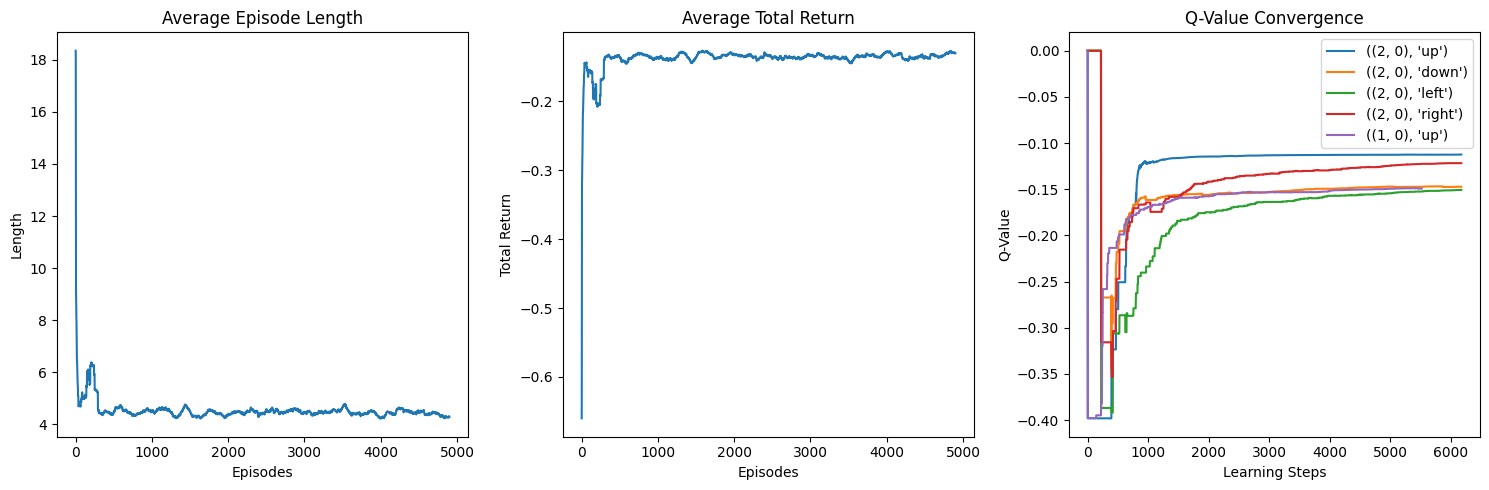

In [22]:
# Visualize the learning process
mc_world.visualize_learning_process()